<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/B_spline_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

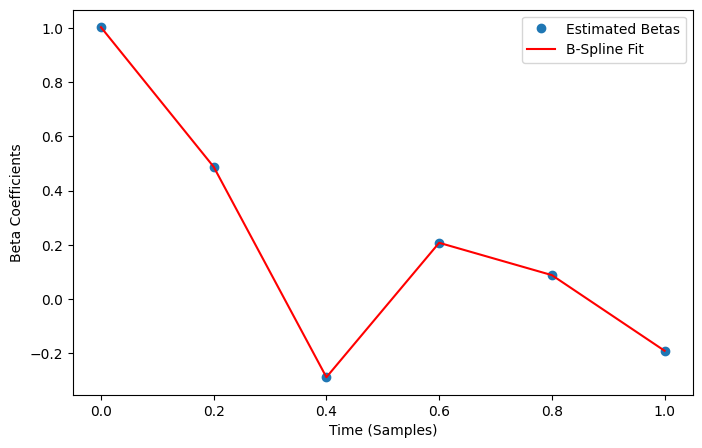

In [1]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

# تعداد نمونه‌ها و مقدارهای تصادفی برای X و Y
n_samples = 100
X = np.random.uniform(-1, 1, n_samples)
Y = np.random.uniform(-1, 1, n_samples)

# تولید مقدارهای Z بر اساس مدل رگرسیونی
beta_true = [1.0, 0.5, -0.3, 0.2, 0.1, -0.2]  # مقادیر واقعی ضرایب
Z = (beta_true[0] + beta_true[1]*X + beta_true[2]*Y +
     beta_true[3]*X**2 + beta_true[4]*X*Y + beta_true[5]*Y**2 +
     np.random.normal(0, 0.1, n_samples))  # نویز اضافه شده

# محاسبه ضرایب تخمینی
X_matrix = np.vstack((np.ones(n_samples), X, Y, X**2, X*Y, Y**2)).T
beta_estimates = np.linalg.lstsq(X_matrix, Z, rcond=None)[0]

# برازش B-Spline به ضرایب رگرسیونی
t = np.linspace(0, 1, len(beta_estimates))  # متغیر زمان برای پایش ضرایب
knots = np.linspace(0, 1, 4)  # تعداد نقاط گرهی (بهینه‌سازی شده)
spl = si.splrep(t, beta_estimates, t=knots[1:-1], k=3)  # ساخت B-Spline
beta_spline = si.splev(t, spl)  # مقدارهای حاصل از B-Spline

# نمایش نتایج
plt.figure(figsize=(8,5))
plt.plot(t, beta_estimates, 'o', label="Estimated Betas")
plt.plot(t, beta_spline, '-', label="B-Spline Fit", color="red")
plt.xlabel("Time (Samples)")
plt.ylabel("Beta Coefficients")
plt.legend()
plt.show()


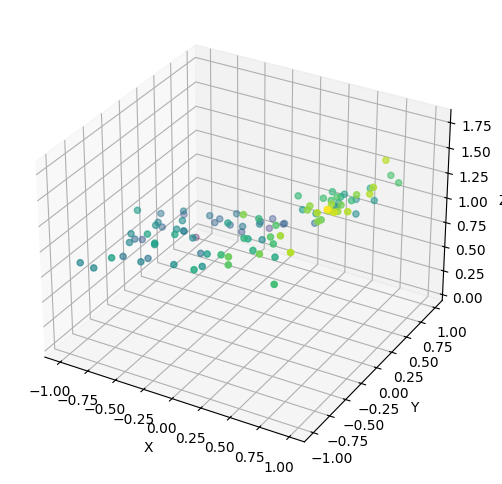

In [2]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# تعداد نمونه‌ها
n_samples = 100

# تولید داده‌های تصادفی برای X و Y
X = np.random.uniform(-1, 1, n_samples)
Y = np.random.uniform(-1, 1, n_samples)

# ضرایب واقعی (که ممکن است تغییر کنند)
beta_true = [1.0, 0.5, -0.3, 0.2, 0.1, -0.2]

# محاسبه Z بر اساس مدل رگرسیونی
Z = (beta_true[0] + beta_true[1]*X + beta_true[2]*Y +
     beta_true[3]*X**2 + beta_true[4]*X*Y + beta_true[5]*Y**2 +
     np.random.normal(0, 0.1, n_samples))  # نویز اضافه شده

# نمایش داده‌ها به صورت سطح سه‌بعدی
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', label="Surface Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


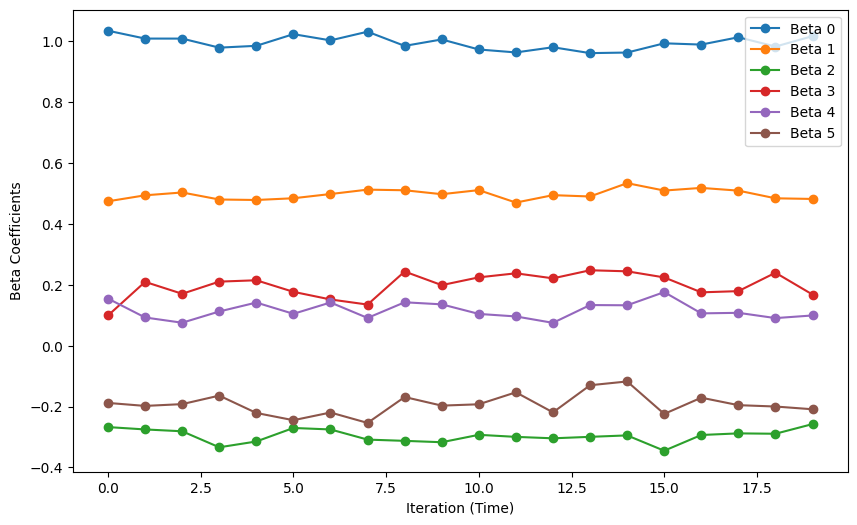

In [3]:
# ساخت ماتریس ویژگی‌ها برای مدل رگرسیونی
X_matrix = np.vstack((np.ones(n_samples), X, Y, X**2, X*Y, Y**2)).T

# محاسبه ضرایب رگرسیونی تخمینی
beta_estimates = np.linalg.lstsq(X_matrix, Z, rcond=None)[0]

# شبیه‌سازی چند نمونه‌گیری مختلف برای پایش تغییرات ضرایب
n_iterations = 20
beta_history = []

for _ in range(n_iterations):
    X_sample = np.random.uniform(-1, 1, n_samples)
    Y_sample = np.random.uniform(-1, 1, n_samples)
    Z_sample = (beta_true[0] + beta_true[1]*X_sample + beta_true[2]*Y_sample +
                beta_true[3]*X_sample**2 + beta_true[4]*X_sample*Y_sample +
                beta_true[5]*Y_sample**2 + np.random.normal(0, 0.1, n_samples))

    X_matrix_sample = np.vstack((np.ones(n_samples), X_sample, Y_sample,
                                 X_sample**2, X_sample*Y_sample, Y_sample**2)).T
    beta_estimates_sample = np.linalg.lstsq(X_matrix_sample, Z_sample, rcond=None)[0]
    beta_history.append(beta_estimates_sample)

beta_history = np.array(beta_history)  # تبدیل به آرایه

# نمایش تغییرات ضرایب در زمان
plt.figure(figsize=(10,6))
for i in range(6):
    plt.plot(range(n_iterations), beta_history[:, i], marker='o', label=f"Beta {i}")
plt.xlabel("Iteration (Time)")
plt.ylabel("Beta Coefficients")
plt.legend()
plt.show()


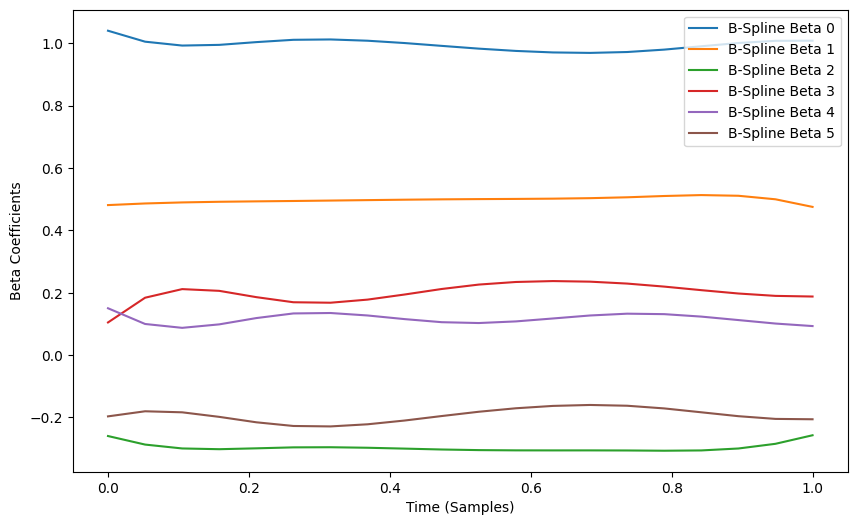

In [4]:
# ایجاد متغیر زمان (برای نمایش تغییرات در زمان)
t = np.linspace(0, 1, n_iterations)

# برازش B-Spline به هر ضریب رگرسیونی
plt.figure(figsize=(10,6))
for i in range(6):
    knots = np.linspace(0, 1, 5)  # تعیین تعداد نقاط گرهی
    spl = si.splrep(t, beta_history[:, i], t=knots[1:-1], k=3)  # B-Spline
    beta_spline = si.splev(t, spl)  # مقدارهای حاصل از B-Spline

    plt.plot(t, beta_spline, '-', label=f"B-Spline Beta {i}")

plt.xlabel("Time (Samples)")
plt.ylabel("Beta Coefficients")
plt.legend()
plt.show()


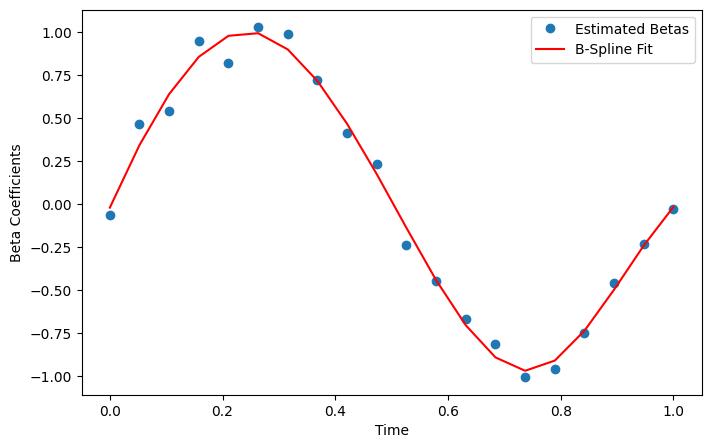

In [5]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

# تعداد نمونه‌ها (مثلاً ضرایب رگرسیونی در 20 آزمایش)
n_iterations = 20
time_points = np.linspace(0, 1, n_iterations)  # متغیر زمان

# شبیه‌سازی مقادیر ضرایب رگرسیونی در طول زمان
beta_values = np.sin(2 * np.pi * time_points) + np.random.normal(0, 0.1, n_iterations)

# برازش B-Spline
knots = np.linspace(0, 1, 5)  # نقاط گرهی
spl = si.splrep(time_points, beta_values, t=knots[1:-1], k=3)  # برازش B-Spline درجه 3
beta_spline = si.splev(time_points, spl)  # مقدارهای حاصل از B-Spline

# نمایش نتایج
plt.figure(figsize=(8,5))
plt.plot(time_points, beta_values, 'o', label="Estimated Betas")
plt.plot(time_points, beta_spline, '-', label="B-Spline Fit", color="red")
plt.xlabel("Time")
plt.ylabel("Beta Coefficients")
plt.legend()
plt.show()
